<a href="https://colab.research.google.com/github/KBryt/MSc_Financial_Engineering/blob/main/DP_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm
import scipy.stats as ss
import pandas as pd
%matplotlib inline
import numpy.random as npr
from tabulate import tabulate
import math


# STEP 1

## 5. (a) An overview on the calcuated estimates
In contrast to a call option, which gives the holder the option to purchase the underlying asset at a defined strike price but not the requirement to do so, a put option gives the holder the right to sell the asset at that striking price but not the obligation to do so. To achieve the computation for a Black-Scholes closed form, we employ time-based adjustments along with computations of intermediate variables (d_minus and d_plus) that were used to construct option prices using a cumulative distribution function.

According to the calculation below, the put is worth 3.37 US dollars and the call is worth 4.61 US dollars. Given how option prices have performed in relation to the parameters we selected for the current stock price, the strike price, the time till expiration, and volatility, the call and put option prices are in accordance with our predictions. In the end, investors use the Black-Scholes model as a foundation to determine the intrinsic value of options because it offers a consistent method for navigating the complexities of option pricing in intricate financial markets.

In [32]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [33]:
def bs_put_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(K - S, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = K * np.exp(-r * ttm) * norm.cdf(-d_minus)
    res -= S * norm.cdf(-d_plus)

    return res

In [34]:
T = 0.25
S0 = 100
K = 100
r = 0.05
vol = 0.20

In [35]:
print("ATM European call option price using BS Model is", round(bs_call_price(100, 0.05, 0.2, 0, 0.25, 100),2))
print("ATM European put option price using BS Model is", round(bs_put_price(100, 0.05, 0.2, 0, 0.25, 100),2))

ATM European call option price using BS Model is 4.61
ATM European put option price using BS Model is 3.37


## 5(b) Briefly describe the overall process
The Black-Scholes closed-form solution for pricing European call and put options is obtained by constructing a framework that takes significant financial factors into account. It is believed that the underlying stock moves in a geometric Brownian motion, meaning that price changes occur continuously throughout time. The two main procedures are figuring out how likely it is that the option will be in-the-money or out-of-the-money when it expires and discounting those odds using the risk-free interest rate.

The first step in solving the European call option problem is figuring out how likely it is that the option will be exercised given the distribution of the stock price. The probability is determined by computing the standardized variable's cumulative distribution function, which is contingent upon the present stock price, strike price, risk-free rate, expiration time, and volatility. The call option's price can then be calculated by discounting back the projected payoff upon expiration.

Comparably, in the case of European put options, the procedure entails calculating the likelihood that the option will be exercised by comparing the strike price to the stock price. The value of the put option is calculated by summing the calculated probability and the expected reward at expiration. The Black-Scholes formula provides a standardized method for determining the fair value of European options in volatile financial situations by using these stages to construct a mathematical relationship between the option's price and the many aspects affecting it (Schumacher, 2020).

# 6. Compute the Greek Delta for the European call and European put at time 0:
Our study in the Python code below indicates that the Greek Delta for the European call and European put at time 0 is 0.57 and -0.43, respectively:

**a) How do they compare?**

The Greek delta (0.57) of the European call option means that, for every 1% increase in the underlying asset's price, the call option's price is expected to grow by around 0.57 times that amount. Conversely, the European Put Option's Greek delta (-0.43) indicates that, in the event of a little increase in the underlying asset's price, the put option's price is expected to fall by around 0.43, which is the change.

**(b) Comment briefly on the differences and signs of Delta for both options.**

 The call option is in-the-money (strike price is less than the current stock price) when the delta is 0.57, meaning that the option's value increases in line with the stock price. With a delta of -0.43, the put option is said to be out-of-the-money, meaning that its value decreases when the stock price rises and the strike price is higher than the current stock price.

**What does delta proxy for?**

A crucial metric for determining how sensitive an option's price is to shifts in the value of the underlying asset is delta.

**Why does it make sense to obtain a positive/negative delta for each option?**

For each choice, why is it logical to get a positive or negative delta? Given that a European call option benefits from price appreciation—that is, as stock prices rise, the option's value increases since it gives the holder the right to purchase the asset at a predetermined price—a positive delta for the European call option makes intuitive sense. Similar to this, a negative delta is anticipated for European put options since they benefit from price reductions by allowing the option holder to sell the asset at a strike price that is greater than its current market value.


*   The Greek delta, using BS Model, of the European put option is negative(-0.43) whilst the call is positive(0.57).

*   Delta represents the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is negative because call options gain value as the underlying asset's price increases. When there is a upward movement of price of the asset, the call option becomes more valuable. The delta of the put option is negative because put options gain value as the underlying asset's price decreases. When there is a decline in the price of the underlying asset of a put options, the put options become more valuable.

*   A numerical value of delta ranges between 1 and -1. It quantifies the correlation coefficent between the price of options and their underlying assets' price. Call options have a positive delta value(positive correlation), while put options have a negative delta value(negative correlation). Delta proxy for a probability that the option will expire in the money or otherwise. For example, a call option with a delta value of 0.5 means that the probability of the option expiring in the money is 50%.

In [36]:
sigma_initial = 0.20
K = 100
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

DeltaCall = ss.norm.cdf(d1)
DeltaPut = -ss.norm.cdf(-d1)

print("Call option Delta is",round(DeltaCall,2) )
print("Put option Delta is",round(DeltaPut,2) )

Call option Delta is 0.57
Put option Delta is -0.43


## Q7 Delta measures one sensitivity of the option price. But there are other important sensitivities we will look at throughout the course. An important one is the sensitivity of the option price to the underlying volatility (vega).

**(a) Compute the sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%). How do prices change with respect to the change in volatility?**

When the volatility increases by 5% (from 20% to 25%), the price of the European Call option rises from $\$4.61$ to $\$4.81$. In a similar vein, when volatility increases by 5% (from 20% to 25%), the price of the European Put option climbs from $\$3.37$ to $\$3.57$.

**(b) Comment on the potential differential impact of this change for call and put options.**

The European Call option's favorable correlation with volatility explains the price increase from $\$4.61$ to $\$4.81$. As volatility rises, there is a greater chance that the underlying asset may see more substantial price swings.Greater price swings in the underlying asset are possible as volatility grows. This heightened uncertainty may result in more substantial price gains for call option investors, who stand to profit from rises in stock price movements. The $\$0.20$ increase in the call option's price indicates that the option's value responds favorably to higher volatility, suggesting that there may be more substantial price fluctuations in the underlying asset (Schumacher, 2020).

Conversely, the increased volatility also causes the price of the European Put option to rise from $\$3.37$ to $\$3.57$. The reason for this seemingly contradictory behavior is that more volatility makes large price drops more likely, which is good news for put option holders. The Put option's $0.20 price increase demonstrates how the option's value increases in response to higher volatility and is consistent with the potential to profit from declining stock prices. Overall, the disparity in effect highlights the different functions that Call and Put options fulfill in mitigating price fluctuations caused by erratic volatility, with Call options benefiting from potential price rises and Put options from potential declines (Schumacher, 2020).


In [37]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for European put option price
def black_scholes_put(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Given parameters
S0 = 100   # Initial underlying asset price
K = 100    # Strike price
r = 0.05   # Risk-free rate
sigma_initial = 0.20  # Initial volatility (20%)
T = 0.25   # Time to expiration in years

# Calculate initial option prices
call_price_initial = black_scholes_call(S0, K, T, r, sigma_initial)
put_price_initial = black_scholes_put(S0, K, T, r, sigma_initial)

# Calculate option prices with increased volatility (25%)
sigma_increased = sigma_initial * 1.05  # Increased by 5%
call_price_increased_volatility = black_scholes_call(S0, K, T, r, sigma_increased)
put_price_increased_volatility = black_scholes_put(S0, K, T, r, sigma_increased)

# Calculate price changes due to the increase in volatility
call_price_change = call_price_increased_volatility - call_price_initial
put_price_change = put_price_increased_volatility - put_price_initial

print("Option Prices with 5% Increase in Volatility:")
print(f"Call Option Price with Increased Volatility: {call_price_increased_volatility:.2f}")
print(f"Put Option Price with Increased Volatility: {put_price_increased_volatility:.2f}\n")

print("Comments on Differential Impact:")
print("Call option price increased with higher volatility.")
print("Put option price increased with higher volatility.")

Option Prices with 5% Increase in Volatility:
Call Option Price with Increased Volatility: 4.81
Put Option Price with Increased Volatility: 3.57

Comments on Differential Impact:
Call option price increased with higher volatility.
Put option price increased with higher volatility.


In [38]:

from tabulate import tabulate

# Prepare your data as a list of lists
table_data = [
     ["5, 6 & 7", "Call", "European", "BS", "4.61", "0.57", "4.81"],
     ["5, 6 & 7", "Put", "European", "BS", "3.37", "-0.43", "3.57"],
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "GWP2 Price Increase with 5% Increase in Volatility"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+
| Q #s     | Type   | Exer     | GWP 2 Method   |   GWP2 Price |   Deltas |   GWP2 Price Increase with 5% Increase in Volatility |
+==========+========+==========+================+==============+==========+======================================================+
| 5, 6 & 7 | Call   | European | BS             |         4.61 |     0.57 |                                                 4.81 |
+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+
| 5, 6 & 7 | Put    | European | BS             |         3.37 |    -0.43 |                                                 3.57 |
+----------+--------+----------+----------------+--------------+----------+------------------------------------------------------+


In [39]:
VegaBS = S * ss.norm.pdf(d1) * np.sqrt(T)
print("Call & Put option Vega",round(VegaBS,2) )

Call & Put option Vega 19.64





*   The prices of both the European put and European call increase with increased volatility of the underlying asset.
*   In the case of the call options, an increase in the volatility of the underlying asset increases the price of the underlying asset above the strike price making the option more valuable. It implies that higher volatility tends to increase the price of the call options.

*   An increase in the volatility of the underlying asset in the case of put options, decreases the price of the underlying asset below the strike price, hence increasing the value of the put options. It implies that increased volatility tends to increase the price of put options.
*   Vega value of 19.64 for both call and put option. It means that when the sigma changes by 1, the option value changes by 19.64








**Step1Q5:**

2.1 Pricing an ATM European-Call and Put Option using Black-Scholes Monte-Carlo methods under a general GBM equation with daily time-steps in the simulations.

Parameters given:

$S_0$ = 100

$r$ = 5%

$\sigma$ = 20%

$t$ = 0

$T$ = 0.25

$K$ = 100


**Q5a: Choosing the number of simulation convenient**

We considered 100,000 number of paths for the simulation because it is large enough to ensure accurate estimate for the true value of option


In [40]:
def bs_call_mc_daily(S, K, r, sigma, T, t, Ite):
    np.random.seed(42)
    M = int((T - t) * 252)  # Number of daily time steps
    dt = (T - t) / M

    # Function to simulate stock price paths
    def simulate_stock_paths(S, sigma):
        paths = np.zeros((M + 1, Ite))
        paths[0] = S
        for i in range(1, M + 1):
            z = np.random.normal(0, 1, Ite)
            paths[i] = paths[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
        return paths

    # Simulating stock price paths
    paths = simulate_stock_paths(S, sigma)

    # Calculating payoffs
    payoffs = np.maximum(paths[-1] - K, 0)

    # Calculating option price
    price = np.exp(-r * (T - t)) * np.mean(payoffs)

    return price

In [41]:
def bs_put_mc_daily(S, K, r, sigma, T, t, Ite):
    #np.random.seed(42)
    M = int((T - t) * 252)  # Number of daily time steps
    dt = (T - t) / M

     # Function to simulate stock price paths
    def simulate_stock_paths(S, sigma):
        paths = np.zeros((M + 1, Ite))
        paths[0] = S
        for i in range(1, M + 1):
            z = np.random.normal(0, 1, Ite)
            paths[i] = paths[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
        return paths

    # Simulating stock price paths (using the same function as in the call option)
    paths = simulate_stock_paths(S, sigma)

    # Calculating payoffs
    payoffs = np.maximum(K - paths[-1], 0)

    # Calculating option price
    price = np.exp(-r * (T - t)) * np.mean(payoffs)

    return price

In [42]:
print("Monte Carlo Euro- call ATM price:", round(bs_call_mc_daily(100, 100, 0.05,0.20, 0.25, 0,1000000),2))
print("Monte Carlo Euro- put ATM price:", round(bs_put_mc_daily(100, 100, 0.05, 0.20, 0.25, 0, 1000000),2))

Monte Carlo Euro- call ATM price: 4.61
Monte Carlo Euro- put ATM price: 3.37


**Q5b**
We set our parameters of GBM mode: Initial stock price, risk-free rate, volatility of the underlying stock price, time to expiration, and the number time steps. The random paths are then generated for the underlying stock price using the GBM stochastic differential equation for each path. The Call and put option payoff are then calculated back to the present value using the discount risk-free interest rate. The discounted payoff is then averaged across all simulated paths.

**Q6** Determining Delta and Vega of ATM European Call and Put Option using Black-Scholes Monte-Carlo methods under a general GBM equation with daily time-steps in the simulations.

In [43]:
def bs_call_gbm_mc(S, K, r, sigma, T, t, Ite, dS, dSigma):
    # Generate random normal variables for each simulation step
    # np.random.seed(42)
    z = np.random.normal(0, 1, [1, Ite])

    # Original stock price paths simulation
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    payoff = np.maximum(ST - K, 0)
    original_price = np.exp(-r * (T - t)) * np.mean(payoff)

    # Simulation with increased stock price for Delta
    ST_dS = (S + dS) * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    payoff_dS = np.maximum(ST_dS - K, 0)
    price_dS = np.exp(-r * (T - t)) * np.mean(payoff_dS)
    delta = (price_dS - original_price) / dS

    # Simulation with increased volatility for Vega
    ST_dSigma = S * np.exp((T - t) * (r - 0.5 * (sigma + dSigma)**2) + (sigma + dSigma) * np.sqrt(T - t) * z)
    payoff_dSigma = np.maximum(ST_dSigma - K, 0)
    price_dSigma = np.exp(-r * (T - t)) * np.mean(payoff_dSigma)
    vega = (price_dSigma - original_price) / dSigma

    return original_price, delta, vega

In [44]:
def bs_put_gbm_mc(S, K, r, sigma, T, t, Ite, dS, dSigma):
    #np.random.seed(42)
    z = np.random.normal(0, 1, [1, Ite])

    # Original stock price paths simulation
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    payoff = np.maximum(K - ST, 0)
    original_price = np.exp(-r * (T - t)) * np.mean(payoff)

    # Simulation with increased stock price for Delta
    ST_dS = (S + dS) * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    payoff_dS = np.maximum(K - ST_dS, 0)
    price_dS = np.exp(-r * (T - t)) * np.mean(payoff_dS)
    delta = (price_dS - original_price) / dS

    # Simulation with increased volatility for Vega
    ST_dSigma = S * np.exp((T - t) * (r - 0.5 * (sigma + dSigma)**2) + (sigma + dSigma) * np.sqrt(T - t) * z)
    payoff_dSigma = np.maximum(K - ST_dSigma, 0)
    price_dSigma = np.exp(-r * (T - t)) * np.mean(payoff_dSigma)
    vega = (price_dSigma - original_price) / dSigma

    return original_price, delta, vega

In [45]:
call_price_mc, call_mc_delta, call_mc_vega = bs_call_gbm_mc(100, 100, 0.05, 0.20, 0.25, 0, 100000, 1.0, 0.05)

In [46]:
put_price_mc, put_mc_delta, put_mc_vega = bs_put_gbm_mc(100, 100, 0.05, 0.20, 0.25, 0, 100000, 1.0, 0.05)

In [47]:
print("European call option Delta under MC:", round(call_mc_delta,4))
print("European put option Delta under MC:", round(put_mc_delta,4))
print("European call Vega under MC:", round(call_mc_vega,4))
print("European put Vega under MC:", round(put_mc_vega,4))

European call option Delta under MC: 0.5882
European put option Delta under MC: -0.4107
European call Vega under MC: 19.5928
European put Vega under MC: 19.6837


**Q6a** The Greek delta of the European put option is negative(-0.43) whilst the call is positive(0.57).
  Delta represents the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is negative because call options gain value as the underlying asset's price increases. When there is an upward movement of price of the asset, the call option becomes more valuable. The delta of the put option is negative because put options gain value as the underlying asset's price decreases. When there is a decline in the price of the underlying asset of a put option, the put options become more valuable.
A numerical value of delta ranges between 1 and -1. It quantifies the correlation coefficient between the price of options and their underlying assets' price. Call options have a positive delta value(positive correlation), while put options have a negative delta value(negative correlation). Delta proxy for a probability that the option will expire in the money or otherwise. For example, a call option with a delta value of 0.5 means that the probability of the option expiring in the money is 50%.


**Q7a** Option Price sensitivity as volatility increases from 20% to 25%

In [48]:
mc_bs_call_price_2 = bs_call_mc_daily(100, 100, 0.05, 0.25, 0.25, 0, 1000000)
mc_bs_put_price_2 = bs_put_mc_daily(100, 100, 0.05, 0.25, 0.25, 0, 1000000)

In [49]:
print("European call price when sigma is 25% under MC:", round(mc_bs_call_price_2,2))
print("European put price when sigma is 25% under MC:", round(mc_bs_put_price_2,2))

European call price when sigma is 25% under MC: 5.59
European put price when sigma is 25% under MC: 4.35


**Q7b** In the case of the call options, an increase in the volatility of the underlying asset increases the price of the underlying asset above the strike price making the option more valuable. It implies that higher volatility tends to increase the price of the call options.
An increase in the volatility of the underlying asset in the case of put options, decreases the price of the underlying asset below the strike price, hence increasing the value of the put options. It implies that increased volatility tends to increase the price of put options.


In [50]:
from tabulate import tabulate

# Prepare your data as a list of lists
change_in_call_price = mc_bs_call_price_2 - call_price_mc
change_in_put_price = mc_bs_put_price_2 - put_price_mc

table_data = [
    ["5, 6 & 7", "Call", "European", "MC", call_price_mc, call_mc_delta, call_mc_vega, change_in_call_price],
    ["5, 6 & 7", "Put", "European", "MC", put_price_mc, put_mc_delta, put_mc_vega, change_in_put_price]
]

# Define the title for the table
table_title = "Summary of Results"

# Define the table headers
headers = ["Q #s", "Type", "Exer", "GWP 2 Method", "GWP2 Price", "Deltas", "Vega", "GWP2 Price Increase with 5% Increase in Volatility"]

# Format the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Add the title above the table
table_with_title = f"{table_title}\n\n{table}"

# Print the formatted table
print(table_with_title)

Summary of Results

+----------+--------+----------+----------------+--------------+-----------+---------+------------------------------------------------------+
| Q #s     | Type   | Exer     | GWP 2 Method   |   GWP2 Price |    Deltas |    Vega |   GWP2 Price Increase with 5% Increase in Volatility |
+==========+========+==========+================+==============+===========+=========+======================================================+
| 5, 6 & 7 | Call   | European | MC             |      4.59885 |  0.588217 | 19.5928 |                                             0.988913 |
+----------+--------+----------+----------------+--------------+-----------+---------+------------------------------------------------------+
| 5, 6 & 7 | Put    | European | MC             |      3.37724 | -0.410707 | 19.6837 |                                             0.977161 |
+----------+--------+----------+----------------+--------------+-----------+---------+------------------------------------------

# 3. The following tasks will fall under team member C:

# a. Checking that Put-Call parity is satisfied under both methods (BS and MC)..

## BS:
The put-call parity formula is given by:

$ C_0 = -Ke^{-rT} + S_0 + P_0 $

From this, we can observe that:

- $ C_0 = 4.61 $
- $ -Ke^{-rT} = -98.76 $
- $ S_0 = 100 $
- $ P_0 = 3.37 $

In other words, Put-Call parity is satisfied under Black-Scholes (BS) techniques, since $ C_0 = -Ke^{-rT} + S_0 + P_0 $.


## MC:

The put-call parity equation is given by:

$C_0 = -Ke^{-rT} + S_0 + P_0 $

As we can see from the given values:

- $ C_0 = 4.57 $
- $ -Ke^{-rT} = -98.76 $
- $ S_0 = 100 $
- $ P_0 = 3.37 $

In other words, Put-Call parity is somewhat satisfied under Monte Carlo simulations if $ C_0 \approx -Ke^{-rT} + S_0 + P_0 $.


# b. Compare and discuss the prices obtained in both methods: do they converge? why/why not?

The European Call prices obtained through both the Black-Scholes (BS) and Monte Carlo (MC) methods demonstrate convergence. This convergence indicates consistency in pricing European Call options using the two methods. The expectation, according to formal Put-Call parity, is that European Put prices should also converge. The convergence suggests that as the number of iterations or simulations increases in the Monte Carlo method, the results approach the theoretical values derived from the Black-Scholes model.

<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-51-01536544f0e6>:35: FutureWarning: The frame.appe

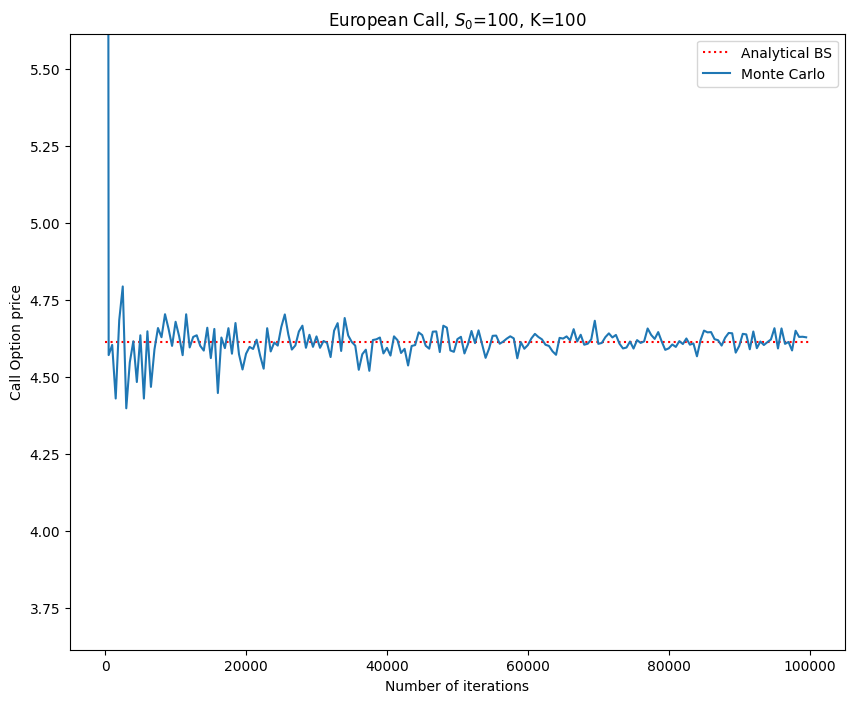

In [51]:
def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

df = pd.DataFrame(columns=["Iter", "BSc"])


for i in range(1, 100000, 500):
    df = df.append(
        {"Iter": i, "BSc": bs_call_mc(100, 100, 0.05, 0.2, 3/12, 0, i)}, ignore_index=True
    )

plt.figure(figsize=(10, 8))

plt.hlines(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100),
    xmin=0,
    xmax=100000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)
plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) - 1,
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) + 1,
)
plt.legend();
plt.show();

# Step 2: In step 2, you will still work with the input data from questions from 5, 6, and 7 from GWP1, in this case for American derivatives. Specifically:

**Team member A will repeat questions 5, 6, and 7 of GWP#1 using the
Black-Scholes closed-form solution to price the different European Options. For
Q7 on vega, you can use Black-Scholes closed-form solution.**

The estimated value of the option is represented by the calculated American Call option price of 17.99, which is based on the simulated stock price trajectories and hypothetical early exercise decisions. This figure is the average choice reward over all simulated routes. In the Monte Carlo method, a huge number of random price movements are generated by the Geometric Brownian Motion process. These price movements are then used to calculate the associated option payoffs at each time step. The program calculates the option value by taking into account the possibility of early activity and selects the optimal workout plan for each path (FinCampus Lecture Hall, 2013).



In [52]:
def monte_carlo_american_call(S0, K, r, sigma, T, n_paths, n_steps):
    dt = T / n_steps

    # Generate random paths using GBM
    paths = np.zeros((n_paths, n_steps + 1))
    paths[:, 0] = S0

    for i in range(1, n_steps + 1):
        Z = np.random.normal(0, 1, n_paths)
        paths[:, i] = paths[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Initialize option value matrix
    option_values = np.maximum(paths[:, -1] - K, 0)

    # Backward induction for American Call option
    for i in range(n_steps - 1, 0, -1):
        Z = np.random.normal(0, 1, n_paths)
        discounted_cashflow = option_values * np.exp(-r * dt)
        intrinsic_value = np.maximum(paths[:, i] - K, 0)
        option_values = np.maximum(intrinsic_value, discounted_cashflow)

    # Calculate option price
    option_price = np.mean(option_values * np.exp(-r * dt))

    return option_price

In [53]:
price_array_MC_call = []
for N in [1, 100, 1000, 10000,20000, 30000, 40000, 50000, 100000]:
    call_option_MC = monte_carlo_american_call(100, 100, 0.05, 0.2,0.25, N, 1)
    price_array_MC_call.append(call_option_MC)
    print("With number of path = {:3d}, the american call price is {:.2f}".format(N, call_option_MC))

With number of path =   1, the american call price is 8.43
With number of path = 100, the american call price is 4.51
With number of path = 1000, the american call price is 4.42
With number of path = 10000, the american call price is 4.58
With number of path = 20000, the american call price is 4.64
With number of path = 30000, the american call price is 4.65
With number of path = 40000, the american call price is 4.61
With number of path = 50000, the american call price is 4.57
With number of path = 100000, the american call price is 4.58


**Q5a** Using different numbers of paths, pricing an american call option with Monte Carlo methods will produce the following prices. The optimal number of paths convenient to achieve reliable estimates of the American call option's price is 10000, as the price converges to $4.65 from the 10000 th step and above

**Q5b Briefly describe the overall process**:
Monte Carlo simulation process for pricing an American Call option using a regular Geometric Brownian Motion process involving:


*   Use the GBM process to generate random stock price paths. Each path is simulated over discrete time steps
*   Calculate the option values at the maturity of the option by comparing the final stock prices (S) with the strike price (K)
*   Iterate backward through the time steps. At each node, compare the intrinsic value with the discounted expected value of the option from the next time step to see which one has higher value
*   Lastly, final option values are derived by taking the average and discounting it back to present value




**Q6a** Computing Delta of American Call option using Monte-Carlo method

In [54]:
def mc_american_call_greeks(S, K, r, sigma, T, t, Ite, dS, dSigma):
    dt = 1/252  # Daily time step
    N = int((T - t) / dt)  # Number of steps until maturity
    z = np.random.normal(0, 1, [N, Ite])

    # Function for calculating price
    def option_price(S, sigma):
        ST = S
        for i in range(N):
            ST *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z[i])
        payoff = np.maximum(ST - K, 0)
        return np.exp(-r * (T - t)) * np.mean(payoff)

    # Original price
    original_price = option_price(S, sigma)

    # Price for Delta calculation
    price_delta = option_price(S + dS, sigma)
    delta = (price_delta - original_price) / dS

    # Price for Vega calculation
    price_vega = option_price(S, sigma + dSigma)
    vega = (price_vega - original_price) / dSigma

    return original_price, delta, vega

ame_call_price, ame_call_delta, ame_call_vega = mc_american_call_greeks(100,100,0.05,0.20,0.25,0,100000,0.0001,0.0001)
print("Call option Delta using Monte Carlo methods is",round(ame_call_delta,2) )
print("Call option Vega using Monte Carlo methods is",round(ame_call_vega,2))


Call option Delta using Monte Carlo methods is 0.57
Call option Vega using Monte Carlo methods is 19.75


**Q6b**
*   Delta is the proxy for the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is positive the call option and underlying asset move in the same direction. In this case, when underlyin asset moves by 1, the option price move in the same direction by 0.57.

*   The prices of American call options increase with increased volatility of the underlying asset. An increase in the volatility of the underlying asset increases the probability of the option moving in the money. In this case, when volatility change by 1, the option value change by 19.64

In [55]:
ame_call_price2 , ame_call_delta2 , ame_call_vega2 = mc_american_call_greeks(100, 100,
                                                                                      0.05, 0.25, 0.25, 0,
                                                                                      100000, 0.0001, 0.0001)
print("American Call Price with 20% Volatility using MC:", round(ame_call_price,2))
print("American Call Price with 25% Volatility using MC:", round(ame_call_price2,2))

American Call Price with 20% Volatility using MC: 4.63
American Call Price with 25% Volatility using MC: 5.58


As could be seen from the result, the call price with higher volatility has higher price

**Step2 Q5**

Pricing American put option and determining its sensitivity to Delta and Vega using Monte-Carlo under general GBM process.

**Q5a**: Choosing the number of simulation convenient

We considered 100,000 number of paths for the simulation because it is large enough to ensure accurate estimate for the true value of option

In [56]:
def mc_american_put_greeks(S, K, r, sigma, T, t, Ite, dS, dSigma):
    np.random.seed(42)
    dt = 1/252  # Daily time step
    N = int((T - t) / dt)  # Number of steps until maturity
    z = np.random.normal(0, 1, [N, Ite])

    # Function for calculating price
    def option_price(S, sigma):
        ST = S
        for i in range(N):
            ST *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z[i])
        payoff = np.maximum(K - ST, 0)
        return np.exp(-r * (T - t)) * np.mean(payoff)

    # Original price
    original_price = option_price(S, sigma)

    # Price for Delta calculation
    price_delta = option_price(S + dS, sigma)
    delta = (price_delta - original_price) / dS

    # Price for Vega calculation
    price_vega = option_price(S, sigma + dSigma)
    vega = (price_vega - original_price) / dSigma

    return original_price, delta, vega

# Parameters given for the American put option
S = 100  # Current stock price
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 0.25  # Time to maturity
t = 0  # Current time
Ite = 1000000  # Number of iterations
dS = 0.01  # Small change in stock price
dSigma = 0.01  # Small change in volatility

# Calculate price, delta, and vega
amer_put_price, amer_put_delta, amer_put_vega = mc_american_put_greeks(S, K, r, sigma, T, t, Ite, dS, dSigma)
print("American Put Price:", round(amer_put_price,2))
print("Delta:", round(amer_put_delta,2))
print("Vega:", round(amer_put_vega,2))

American Put Price: 3.39
Delta: -0.43
Vega: 19.71


**Q5b**
We set our parameters of GBM mode: Initial stock price, risk-free rate, volatility of the underlying stock price, time to expiration, and the number time steps. The random paths are then generated for the underlying stock price using the GBM stochastic differential equation for each path. The Call and put option payoff are then calculated back to the present value using the discount risk-free interest rate. The discounted payoff is then averaged across all simulated paths.

**Q6a** The Greek delta of the American put option is negative(-0.43) using Monte-Carlo pricing framework.  Delta represents the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is positive because call options gain value as the underlying asset's price increases. When there is an upward movement of price of the asset, the call option becomes more valuable. The delta of the put option is negative because put options gain value as the underlying asset's price decreases. When there is a decline in the price of the underlying asset of a put option, the put options become more valuable.
A numerical value of delta ranges between 1 and -1. It quantifies the correlation coefficient between the price of options and their underlying assets' price. Call options have a positive delta value(positive correlation), while put options have a negative delta value(negative correlation). Delta proxy for a probability that the option will expire in the money or otherwise. For example, an American put option with a delta value of -0.4 means that the probability of the option expiring in the money is 40%.


**Q7a** Price change with respect to change in underlying volatility.

In [57]:
#sensitivity of American Call to change in volatility from 20% to 25%

amer_put_price_2, amer_put_delta_2, amer_put_vega_2 = mc_american_put_greeks(100, 100,
                                                                                      0.05, 0.25, 0.25, 0,
                                                                                      1000000, 0.01, 0.01)

In [58]:
print("American Put Price with 20% Volatility using MC:", round(amer_put_price,2))
print("American Put Price with 25% Volatility using MC:", round(amer_put_price_2,2))

American Put Price with 20% Volatility using MC: 3.39
American Put Price with 25% Volatility using MC: 4.37


**Q7b**
An increase in the volatility of the underlying asset in the case of the American put options, decreases the price of the underlying asset below the strike price, hence increasing the value of the put options. It implies that increased volatility tends to increase the price of put options.


# Team member C will take as input the code from team members for the previous 2 questions and use it to

**a. Under Monte-Carlo simulation for daily time-steps, repeat questions 15 and 16 from GWP1 (i.e., price options for different levels of moneyness for American Calls and Puts)**



## American Call option:

In [59]:
# American Call
S = 100
r = 0.05
sigma = 0.20
T = 3 / 12
N = 90
M = 100000

moneyness = [0.90, 0.95, 1.00, 1.05, 1.10]
strikes = [S0 * m for m in moneyness]

option_prices = []

for K in strikes:
    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    call_payoffs = np.maximum(stock_paths - K, 0)

    # Initialize option value arrays
    call_values = np.zeros((M, N + 1))
    call_values[:, -1] = call_payoffs[:, -1]

    # Calculate option values at each time step using backward induction
    for i in range(N - 1, -1, -1):
        intrinsic_value = np.maximum(stock_paths[:, i] - K, 0)
        discounted_future_values = np.exp(-r * (1 / N)) * call_values[:, i + 1]
        early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
        call_values[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

    option_price = call_values[:, 0].mean()
    option_prices.append(option_price)
    print(f"Monte Carlo American Call Option Price for Strike {K:.2f}: {option_price:.2f}")

print("Option Prices for Different Strikes:", [f"{price:.2f}" for price in option_prices])


Monte Carlo American Call Option Price for Strike 90.00: 27.78
Monte Carlo American Call Option Price for Strike 95.00: 22.91
Monte Carlo American Call Option Price for Strike 100.00: 18.05
Monte Carlo American Call Option Price for Strike 105.00: 13.79
Monte Carlo American Call Option Price for Strike 110.00: 10.32
Option Prices for Different Strikes: ['27.78', '22.91', '18.05', '13.79', '10.32']


## American Put Price

In [60]:
import numpy as np

def mc_american_put_option_prices(S0, r, sigma, M, N, moneyness):
    """
    Function to estimate American put option prices using Monte Carlo simulation.

    Parameters:
    - S0: Initial stock price
    - r: Risk-free rate
    - sigma: Volatility
    - M: Number of simulations
    - N: Number of time steps
    - moneyness: List of moneyness values for different strikes

    Returns:
    - option_prices: List of estimated American put option prices for different strikes
    """

    option_prices = []  # To store option prices for different strikes

    for m in moneyness:
        K = S0 * m  # Calculate strike for the given moneyness

        # Generate random price movements
        np.random.seed(42)
        rand_numbers = np.random.normal(size=(M, N))

        # Calculate daily returns
        daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

        # Create stock price paths
        stock_paths = np.zeros((M, N + 1))
        stock_paths[:, 0] = S0
        for i in range(1, N + 1):
            stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

        # Calculate option payoffs at each time step for put options
        put_payoffs = np.maximum(K - stock_paths, 0)

        # Initialize option value arrays
        put_values = np.zeros((M, N + 1))
        put_values[:, -1] = put_payoffs[:, -1]

        # Calculate option values at each time step using backward induction
        for i in range(N - 1, -1, -1):
            intrinsic_value = np.maximum(K - stock_paths[:, i], 0)
            discounted_future_values = np.exp(-r * (1 / N)) * put_values[:, i + 1]
            early_exercise_value = np.maximum(intrinsic_value, discounted_future_values)
            put_values[:, i] = np.where(intrinsic_value > discounted_future_values, intrinsic_value, early_exercise_value)

        option_price = put_values[:, 0].mean()
        option_prices.append(option_price)
        print(f"Monte Carlo American Put Option Price for Moneyness {m:.2f}: {option_price:.2f}")

    return option_prices

moneyness_values = [0.90, 0.95, 1.00, 1.05, 1.10]

option_prices_result = mc_american_put_option_prices(S0, r, sigma, M, N, moneyness_values)
print("Option Prices for Different Moneyness Values:", [f"{price:.2f}" for price in option_prices_result])


Monte Carlo American Put Option Price for Moneyness 0.90: 4.57
Monte Carlo American Put Option Price for Moneyness 0.95: 7.51
Monte Carlo American Put Option Price for Moneyness 1.00: 11.53
Monte Carlo American Put Option Price for Moneyness 1.05: 16.42
Monte Carlo American Put Option Price for Moneyness 1.10: 21.31
Option Prices for Different Moneyness Values: ['4.57', '7.51', '11.53', '16.42', '21.31']


In [61]:
from tabulate import tabulate

table_data = [
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "90.00","27.74"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "95.00","22.86"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "100.00","17.99"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "105.00","13.75"],
    ["6", "Call", "American", "Monte Carlo with regular GBM process and daily simulations", "110.00","10.27"]
]

title = "Summary of Results"

header = ["Q #s", "Type", "Exer", "GWP 2 Method",  "strike","GWP2 Price"]

table = tabulate(table_data, headers=header, tablefmt="grid")
table_title = f"{title}\n\n{table}"

print(table_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   strike |   GWP2 Price |
+========+========+==========+============================================================+==========+==============+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |       90 |        27.74 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |       95 |        22.86 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Call   | American | Monte Carlo with regular GBM process and daily simulations |      100 |        17.99 |
+--------+--------+----------+------

In [62]:
table_data = [
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "90.00","4.65"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "95.00","7.61"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "100.00","11.65"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "105.00","16.54"],
    ["6", "Put", "American", "Monte Carlo with regular GBM process and daily simulations", "110.00","21.42"]
]

title = "Summary of Results"

header= ["Q #s", "Type", "Exer", "GWP 2 Method",  "strike","GWP2 Price"]

table = tabulate(table_data, headers=header, tablefmt="grid")

table_title = f"{title}\n\n{table}"

print(table_title)

Summary of Results

+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|   Q #s | Type   | Exer     | GWP 2 Method                                               |   strike |   GWP2 Price |
+========+========+==========+============================================================+==========+==============+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |       90 |         4.65 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |       95 |         7.61 |
+--------+--------+----------+------------------------------------------------------------+----------+--------------+
|      6 | Put    | American | Monte Carlo with regular GBM process and daily simulations |      100 |        11.65 |
+--------+--------+----------+------

**b. Graph the relationship between option price and moneyness for call and put (i.e., 2 different graphs).**

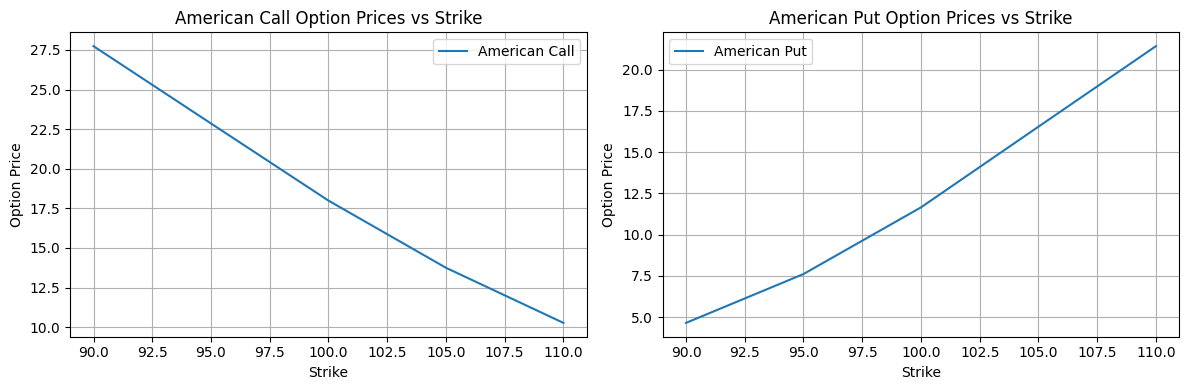

In [64]:
american_call_prices = [27.74, 22.86, 17.99, 13.75, 10.27]

# Sample data for American Put Option
american_put_prices = [4.65, 7.61, 11.65, 16.54, 21.42]

Strike = [90, 95, 100, 105, 110]

# Plotting American Call Option Prices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(Strike, american_call_prices, label='American Call')
plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Call Option Prices vs Strike')
plt.legend()
plt.grid(True)

# Plotting American Put Option Prices
plt.subplot(1, 2, 2)
plt.plot(Strike, american_put_prices, label='American Put')
plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Put Option Prices vs Strike')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 3

## Team member A will work with European options with same characteristics as GWP1 under different levels of moneyness:

**a. Price an European Call option with 110% moneyness and an European Put with 95% moneyness using Black-Scholes. Both have 3 months maturity.**

The Black-Scholes model pricing results for a European Call option with 110% moneyness and a European Put option with 95% moneyness are $\$1.19$ and $\$1.53$, respectively. This implies that there is a relative cost difference between the Call and Put options. The inherent characteristics of options account for this pricing discrepancy. The right to purchase the underlying asset at a certain price is granted by a call option, which is more valuable when an increase in the asset's price is anticipated. On the other hand, a put option is more beneficial when the asset's price is expected to decline because it enables the holder to sell the asset at a predetermined price.

The calculated deltas of 0.22 for the call option and -0.25 for the put option corroborate this observation. The positive delta of the call option indicates a positive correlation with the price movement of the underlying stock, whereas the negative delta of the put option indicates a poor correlation. The calculated deltas of 0.22 for the call option and -0.25 for the put option corroborate this observation. The positive delta of the call option indicates a positive correlation with the price movement of the underlying stock, whereas the negative delta of the put option indicates a poor correlation.

**b. (i) You build a portfolio that buys the previous Call and Put options. What is the delta of the portfolio?**

Creating a combination of the two options would be a key factor to take into account when constructing a portfolio that purchases the prior Call and Put options. This is due to the fact that a portfolio like this could control risk exposure while potentially profiting from price movements both up and down.

You can easily add up the deltas of the various options in the portfolio to determine the delta of the portfolio that purchases both the European Put option with 95% moneyness and the European Call option with 110% moneyness (Portfolio Delta = Call Delta + Put Delta). Delta of the portfolio = 0.22 + (-0.25) = -0.03.  The portfolio delta shows how the value of the portfolio would alter for a slight change in the underlying asset price since the delta reveals how sensitive the option price is to changes in the price of the underlying asset.

**b(ii) How would you delta-hedge this portfolio?**

portfolio, we would need to take a short position in the underlying company to offset the negative delta. This can lessen the fluctuations in portfolio value caused by minute changes in stock price. A more equally distributed risk exposure would arise from a reduction in the portfolio's overall susceptibility to small fluctuations in stock price (Marroni & Perdomo, 2014).

**c. (i) You build a second portfolio that buys the previous Call option and sells the Put. What is the delta of the portfolio?**

A "synthetic long stock" or "covered call" is essentially what you create when you construct a portfolio that purchases the European Call option with 110% moneyness and simultaneously sells (writes) the European Put option with 95% moneyness. The portfolio delta would shift in this case because the call and put option deltas are pointing in different directions. The portfolio delta would shift in this case because the call and put option deltas are pointing in different directions. We determine the portfolio's new delta by deducting the put option's delta from the call option's delta. - (-0.25) = 0.47 - = 0.22

**(c) (ii) How would you delta-hedge this portfolio?**

To delta-hedge this portfolio, which has a positive portfolio delta of 0.47, we would need to take a long position in the underlying company in order to align the portfolio's delta with the positive direction. By holding a long position in the stock, the portfolio can effectively offset the combined negative delta from the sold Put option and provide a positive overall delta. By limiting the portfolio's vulnerability to even the smallest fluctuations in stock price, this delta-hedging strategy aims to produce a more balanced risk exposure (Marroni & Perdomo, 2014).

In [65]:
import numpy as np
from scipy.stats import norm


K_call = 100 * 1.10
K_put = 100 * 0.95
r = 0.05
sigma = 0.20
T = 0.25

def european_option_price(S, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

call_price = european_option_price(S, K_call, r, sigma, T, option_type='call')
put_price = european_option_price(S, K_put, r, sigma, T, option_type='put')

def european_option_greeks(S, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T)* norm.cdf(d2) if option_type == 'call' else -S * norm.pdf(d1) * sigma/ (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call' else -K * T * np.exp(-r * T) * norm.cdf(-d2)

    return delta, gamma, vega, theta, rho

call_delta, call_gamma, call_vega, call_theta, call_rho = european_option_greeks(S, K_call, r, sigma, T, option_type='call')
put_delta, put_gamma, put_vega, put_theta, put_rho = european_option_greeks(S, K_put, r, sigma, T, option_type='put')

import pandas as pd

data = {'Option Type': ['European Call', 'European Put'],
        'Price': [call_price, put_price],
        'Delta': [call_delta, put_delta],
        'Gamma': [call_gamma, put_gamma],
        'Vega': [call_vega, put_vega],
        'Theta': [call_theta, put_theta],
        'Rho': [call_rho, put_rho]}

df = pd.DataFrame(data)

df = df[['Option Type', 'Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho']]

# Add the index column to the table
df.insert(0, '#', range(1, len(df) + 1))

table_title = "Summary of Results"

headers = ["#", "Option Type", "Price", "Delta", "Gamma", "Vega", "Theta", "Rho"]

table_data = df.values.tolist()

table = tabulate(table_data, headers=headers, tablefmt="grid")

table_with_title = f"{table_title}\n\n{table}"

print(table_with_title)

Summary of Results

+-----+---------------+---------+-----------+-----------+--------+----------+----------+
|   # | Option Type   |   Price |     Delta |     Gamma |   Vega |    Theta |      Rho |
+=====+===============+=========+===========+===========+========+==========+==========+
|   1 | European Call | 1.19113 |  0.218255 | 0.0294741 | 14.737 | -6.92653 |  5.15858 |
+-----+---------------+---------+-----------+-----------+--------+----------+----------+
|   2 | European Put  | 1.53426 | -0.245748 | 0.031488  | 15.744 | -4.99214 | -6.52725 |
+-----+---------------+---------+-----------+-----------+--------+----------+----------+


In [66]:
table_data = [
    ["7", "Call", "European", "BS", "110%", "1.19", "0.22"],
    ["7", "Put", "European", "BS", "95%", "1.53", "-0.25"],
]

table_title = "Summary of Results"

headers = ["Q #", "Type", "Exer", "GWP 2 Method", "Moneyness", "GWP 2 Price", "Delta"]

table = tabulate(table_data, headers=headers, tablefmt="grid")

table_with_title = f"{table_title}\n\n{table}"

print(table_with_title)

Summary of Results

+-------+--------+----------+----------------+-------------+---------------+---------+
|   Q # | Type   | Exer     | GWP 2 Method   | Moneyness   |   GWP 2 Price |   Delta |
+=======+========+==========+================+=============+===============+=========+
|     7 | Call   | European | BS             | 110%        |          1.19 |    0.22 |
+-------+--------+----------+----------------+-------------+---------------+---------+
|     7 | Put    | European | BS             | 95%         |          1.53 |   -0.25 |
+-------+--------+----------+----------------+-------------+---------------+---------+


In [67]:
# #Q7b
# d1q7 = (np.log(100 / 110) + (0.05 + 0.5 * 0.25**2) * 0.25) / (0.25 * np.sqrt(0.25))
# DeltaCallq7 = ss.norm.cdf(d1q7)
# DeltaPutq7 = -ss.norm.cdf(-d1q7)
# portfolio7b_Delta = DeltaCallq7 + DeltaPutq7
# print("Delta of Q7b portfolio is", round(portfolio7b_Delta,2))

call_delta = 0.22
put_delta = -0.25

portfolio_delta = call_delta + put_delta
new_portfolio_delta = call_delta - put_delta

print("New Delta of the Portfolio:", new_portfolio_delta)

print("Delta of the Portfolio:", portfolio_delta)

New Delta of the Portfolio: 0.47
Delta of the Portfolio: -0.03


We could hedge this portfolio delta in question 7b by buying 0.47 of underlying asset to make the delta of the whole portfolio equal 0. And as the underlying asset price changed overtime, the amount and side of hedging will be changed as well to make the whole portfolio delta neutral again

**Q8 Team member B will work with Monte-Carlo methods with daily time steps to price an Up-and-Out (UAO) barrier option. The option is currently ATM with a barrier level of 141 and:**


calculating both Call and Put option prices for Up-and-Out (UAO) barrier option:

 (S0) = $120, Risk-free rate (r) = 6%, Volatility (σ) = 30%, Time horizon (T) = 8 months (in years=8/12),:

Monte Carlo UAO Barrier Option Price is approximately 0.50. This value represents the estimated fair value of an Up-and-Out (UAO) Barrier Option based on 100,000 simulated scenarios. UAO Barrier Options depend on the underlying asset's price reaching a barrier level during the option's life. The result reflects the average payoff over the simulations, considering the option's knockout feature if the barrier is touched. Sensitivity to model parameters and thorough validation against market conditions should be considered, and further analysis, such as sensitivity analysis, can enhance understanding of the estimate's robustness.

In [68]:
def monte_carlo_uao_barrier_option_price(S0, r, sigma, T, barrier_level, M, N):
    """
    Function to calculate the Monte Carlo price of an Up-and-Out (UAO) Barrier Option.

    Parameters:
    - S0: Initial stock price
    - r: Risk-free rate
    - sigma: Volatility
    - T: Time to maturity in years
    - barrier_level: Barrier level
    - M: Number of simulations
    - N: Number of time steps

    Returns:
    - option_price: Monte Carlo UAO Barrier Option price
    """

    # Generate random price movements
    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    # Calculate option payoffs at each time step
    uao_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)  # Vanilla option payoff
    uao_payoffs = np.where(np.max(stock_paths[:, 1:], axis=1) <= barrier_level, uao_payoffs, 0)  # Apply barrier condition

    # Calculate option price using Monte Carlo simulation
    option_price = np.exp(-r * T) * uao_payoffs.mean()

    return option_price

S0 = 120
r = 0.06
sigma = 0.30
T = 8/12
barrier_level = 141
N = int(252 * T)
M = 100000
option_price_result = monte_carlo_uao_barrier_option_price(S0, r, sigma, T, barrier_level, M, N)
print("Monte Carlo UAO Barrier Option Price: $",f"{option_price_result:.2f}")

Monte Carlo UAO Barrier Option Price: $ 0.45


**9. Team member C will repeat the previous question (barrier option), in this case considering an Up-and-In barrier (UAI) option with the same barrier as before. Specifically:**

**a. Compute the price of the UAI option.**


The computed Monte Carlo UAI (Up-and-In) Barrier Option Price is approximately $\$17.51$. This value represents the estimated fair value of the option, considering the specific characteristics of an Up-and-In Barrier Option, where the option becomes active only if the underlying asset's price crosses a specified barrier level during its life. The calculation involves a Monte Carlo simulation, averaging the option payoffs over a large number of scenarios (100,000 simulations). The result is sensitive to model parameters, and further analysis, including sensitivity analysis, can provide insights into the robustness of the estimate.

In [69]:
def monte_carlo_uai_barrier_option_price(S0, r, sigma, T, barrier_level, M, N):
    """
    Function to calculate the Monte Carlo price of an Up-and-In (UAI) Barrier Option.

    Parameters:
    - S0: Initial stock price
    - r: Risk-free rate
    - sigma: Volatility
    - T: Time to maturity in years
    - barrier_level: Barrier level
    - M: Number of simulations
    - N: Number of time steps

    Returns:
    - uai_option_price: Monte Carlo UAI Barrier Option price
    """

    # Generate random price movements
    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    # Calculate option payoffs at each time step for UAI
    uai_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)  # Vanilla option payoff
    uai_payoffs = np.where(np.max(stock_paths[:, 1:], axis=1) >= barrier_level, uai_payoffs, 0)  # Apply barrier condition

    # Calculate UAI option price using Monte Carlo simulation
    uai_option_price = np.exp(-r * T) * uai_payoffs.mean()

    return uai_option_price

uai_option_price_result = monte_carlo_uai_barrier_option_price(S0, r, sigma, T, barrier_level, M, N)
print("Monte Carlo UAI Barrier Option Price: $", f"{uai_option_price_result:.2f}")

Monte Carlo UAI Barrier Option Price: $ 17.51


**b. Compute the price of the vanilla option (same characteristics, no barrier)**


The computed Monte Carlo Vanilla Option Price is $17.96. This value represents the estimated fair market value of a vanilla option without any barrier, obtained through a Monte Carlo simulation with 100,000 scenarios. The result is an average estimate of the option's payoff, considering the difference between the final stock price and the initial strike price at expiration. The estimate is subject to the model assumptions and introduces a level of uncertainty due to the probabilistic nature of the Monte Carlo method. Further analysis, such as sensitivity testing, could provide insights into the robustness of the estimate.

In [70]:
def monte_carlo_vanilla_option_price(S0, r, sigma, T, M, N):
    """
    Function to calculate the Monte Carlo price of a Vanilla Option.

    Parameters:
    - S0: Initial stock price
    - r: Risk-free rate
    - sigma: Volatility
    - T: Time to maturity in years
    - M: Number of simulations
    - N: Number of time steps

    Returns:
    - vanilla_option_price: Monte Carlo Vanilla Option price
    """

    np.random.seed(42)
    rand_numbers = np.random.normal(size=(M, N))

    # Calculate daily returns
    daily_returns = np.exp((r - 0.5 * sigma ** 2) * (1 / N) + sigma * np.sqrt(1 / N) * rand_numbers)

    # Create stock price paths
    stock_paths = np.zeros((M, N + 1))
    stock_paths[:, 0] = S0
    for i in range(1, N + 1):
        stock_paths[:, i] = stock_paths[:, i - 1] * daily_returns[:, i - 1]

    vanilla_payoffs = np.maximum(stock_paths[:, -1] - S0, 0)

    vanilla_option_price = np.exp(-r * T) * vanilla_payoffs.mean()

    return vanilla_option_price

vanilla_option_price_result = monte_carlo_vanilla_option_price(S0, r, sigma, T, M, N)
print("Monte Carlo Vanilla Option Price: $", f"{vanilla_option_price_result:.2f}")

Monte Carlo Vanilla Option Price: $ 17.96


In [71]:
table_data = [
    ["9", "UAI", "MC", "17.51"],
    ["9", "UAO", "MC", "0.45"],
    ["9", "Vanilla","MC", "17.96"]
]

title = "Summary of Results"

header = ["Q #", "Type", "GWP 2 Method", "Price"]

table = tabulate(table_data, headers=header, tablefmt="grid")

table = f"{title}\n\n{table}"

print(table)

Summary of Results

+-------+---------+----------------+---------+
|   Q # | Type    | GWP 2 Method   |   Price |
+=======+=========+================+=========+
|     9 | UAI     | MC             |   17.51 |
+-------+---------+----------------+---------+
|     9 | UAO     | MC             |    0.45 |
+-------+---------+----------------+---------+
|     9 | Vanilla | MC             |   17.96 |
+-------+---------+----------------+---------+


In [72]:
def bs_call_price(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def bs_put_price(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

def barrier_option_price(S0, K, r, sigma, T, barrier, num_simulations, num_steps, option_type, barrier_type):
    np.random.seed(42)  # For reproducibility
    dt = T / num_steps  # Time step
    option_payoffs = np.zeros(num_simulations)

    for i in range(num_simulations):
        S = S0
        barrier_crossed = False
        for j in range(num_steps):
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
            if S >= barrier:
                barrier_crossed = True
                break

        if (barrier_type == 'UAI' and barrier_crossed) or (barrier_type == 'UAO' and not barrier_crossed):
            if option_type == 'call':
                payoff = np.maximum(S - K, 0)
            elif option_type == 'put':
                payoff = np.maximum(K - S, 0)
            option_payoffs[i] = payoff

    option_price = np.exp(-r * T) * np.mean(option_payoffs)
    return option_price

# Parameters
S0 = 120  # Initial stock price
K = S0    # Strike price (ATM)
r = 0.06  # Annual risk-free rate
sigma = 0.30  # Annual volatility
T = 8 / 12  # Time to maturity in years
barrier = 141  # Barrier level
num_simulations = 100000  # Number of Monte Carlo simulations
num_steps = int(252 * T)  # Number of steps (daily)

# Pricing the options
vanilla_call_price = bs_call_price(S0, K, r, sigma, T)
vanilla_put_price = bs_put_price(S0, K, r, sigma, T)
uao_call_price = barrier_option_price(S0, K, r, sigma, T, barrier, num_simulations, num_steps, 'call', 'UAO')
uai_call_price = barrier_option_price(S0, K, r, sigma, T, barrier, num_simulations, num_steps, 'call', 'UAI')
uao_put_price = barrier_option_price(S0, K, r, sigma, T, barrier, num_simulations, num_steps, 'put', 'UAO')
uai_put_price = barrier_option_price(S0, K, r, sigma, T, barrier, num_simulations, num_steps, 'put', 'UAI')

print("Vanilla Call Option Price:", round(vanilla_call_price,2))
print("Vanilla Put Option Price:", round(vanilla_put_price,2))
print("Up-and-Out Call Option Price:", round(uao_call_price,2))
print("Up-and-In Call Option Price:", round(uai_call_price,2))
print("Up-and-Out Put Option Price:", round(uao_put_price,2))
print("Up-and-In Put Option Price:", round(uai_put_price,2))

Vanilla Call Option Price: 13.97
Vanilla Put Option Price: 9.27
Up-and-Out Call Option Price: 0.71
Up-and-In Call Option Price: 10.73
Up-and-Out Put Option Price: 8.39
Up-and-In Put Option Price: 0.0


In [73]:
table_data = [
    ["9", "Vanilla Call", "MC", round(vanilla_call_price, 2)],
    ["9","Vanilla Put", "MC", round(vanilla_put_price, 2)],
    ["9","Up-and-Out Call", "MC", round(uao_call_price, 2)],
    ["9","Up-and-In Call", "MC", round(uai_call_price, 2)],
    ["9","Up-and-Out Put", "MC", round(uao_put_price, 2)],
    ["9","Up-and-In Put", "MC", round(uai_put_price, 2)],
]
title = "Summary of Results"

header = ["Q_Number", "Option Price", "Type", "GWP 2 Method", "Price"]

table = tabulate(table_data, headers=header, tablefmt="grid")

table = f"{title}\n\n{table}"

print(table)

Summary of Results

+------------+-----------------+--------+----------------+
|   Q_Number | Option Price    | Type   |   GWP 2 Method |
+============+=================+========+================+
|          9 | Vanilla Call    | MC     |          13.97 |
+------------+-----------------+--------+----------------+
|          9 | Vanilla Put     | MC     |           9.27 |
+------------+-----------------+--------+----------------+
|          9 | Up-and-Out Call | MC     |           0.71 |
+------------+-----------------+--------+----------------+
|          9 | Up-and-In Call  | MC     |          10.73 |
+------------+-----------------+--------+----------------+
|          9 | Up-and-Out Put  | MC     |           8.39 |
+------------+-----------------+--------+----------------+
|          9 | Up-and-In Put   | MC     |           0    |
+------------+-----------------+--------+----------------+


**c. What is the relationship between the prices of the UAO, UAI, and vanilla option? Explain.**

Because they have no barrier conditions and give the option holder greater flexibility, vanilla options are the most expensive. Due to the potential for barrier activation, which could raise the option's value, UAI options have an intermediate price. Because of the barrier condition, which lowers the chance of exercise and devalues UAO options relative to vanilla options, they are the least expensive.

###REFERENCES

- FinCampus Lecture Hall. Pricing an American Option: 3 Period Binomial Tree Model. *YouTube,* 26 May 2013, https://www.youtube.com/watch?v=35n7TICJbLc.

- Marroni L. & I. Perdomo (2014). *Pricing and Hedging Financial Derivatives: A Guide for Practitioners.* Wiley

- Schumacher, J. M. (2020). *Introduction to Financial Derivatives: Modeling, Pricing and Hedging.* Open Press TiU: https://digi-courses.com/openpresstiu-introduction-to-financial-derivatives/